### 웹 크롤링 방법
- 동적페이지 : URL의 변경 없이 페이지의 내용이 변경 : json
- 정적페이지 : URL이 변경되면서 페이지의 내용이 변경 : html

In [1]:
import pandas as pd
import requests

#### 네이버 주가 데이터 수집
 - 동적 페이지 : JSON
 - PC페이지가 복잡하면 모바일 페이지에서 수집

In [2]:
# 1. 웹서비스 분석 : 개발자 도구 : URL

In [13]:
page_size, page = 20 , 1
url = f"https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}"

In [14]:
# 2. 서버에 데이터 요청 : request(URL) > response(JSON(str))

In [15]:
response = requests.get(url)
response

<Response [200]>

In [16]:
response.text[:200]

'[{"localTradedAt":"2022-02-21","closePrice":"2,728.02","compareToPreviousClosePrice":"-16.50","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.60","openPrice"'

In [17]:
# 3. JSON(str) > parsing > dict, list > DataFrame

In [18]:
datas = response.json()
type(datas)

list

In [19]:
columns = ["localTradedAt", "closePrice"]
kospi_df = pd.DataFrame(datas)[columns]
kospi_df

,localTradedAt,closePrice
0,2022-02-21,"2,728.02"
1,2022-02-18,"2,744.52"
2,2022-02-17,"2,744.09"
3,2022-02-16,"2,729.68"
4,2022-02-15,"2,676.54"
5,2022-02-14,"2,704.48"
6,2022-02-11,"2,747.71"
7,2022-02-10,"2,771.93"
8,2022-02-09,"2,768.85"
9,2022-02-08,"2,746.47"


In [20]:
# 4. 함수로 만들기


In [25]:
def stock_price(code = "KOSPI", page_size = 20, page = 1):
    """
    params: code(KOSPI or KOSDAQ)
    """
    url = f"https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}"
    response = requests.get(url)
    datas = response.json()
    columns = ["localTradedAt", "closePrice"]
    kospi_df = pd.DataFrame(datas)[columns]
    return kospi_df

In [26]:
df = stock_price("KOSDAQ")

In [27]:
df.head()

,localTradedAt,closePrice
0,2022-02-21,879.92
1,2022-02-18,881.71
2,2022-02-17,874.22
3,2022-02-16,878.15
4,2022-02-15,839.92


In [ ]:
# 5. 실습 : 원달러 환율 데이터 수집

In [37]:
def exchange_rate(code = "FX_USDKRW", page_size = 20, page = 1):
    url = f"https://api.stock.naver.com/marketindex/exchange/{code}/prices?page={page}&pageSize={page_size}"
    response = requests.get(url)
    datas = response.json()
    return pd.DataFrame(datas)[["localTradedAt", "closePrice"]]

In [38]:
usd = exchange_rate()
usd.head()

,localTradedAt,closePrice
0,2022-02-21,"1,195.00"
1,2022-02-18,"1,195.50"
2,2022-02-17,"1,197.50"
3,2022-02-16,"1,198.00"
4,2022-02-15,"1,197.50"


In [39]:
# 시각화 및 상관관계

In [40]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# 데이터 수집 : kospi, kosdaq, usd

In [55]:
kospi = stock_price()
kosdaq = stock_price("KOSDAQ")
usd = exchange_rate()

In [56]:
# 데이터 전처리 : str > float

In [57]:
kospi.dtypes

localTradedAt    object
closePrice       object
dtype: object

In [58]:
kospi["closePrice"] = kospi["closePrice"].apply(lambda data: float(data.replace(",", "")))
kosdaq["closePrice"] = kosdaq["closePrice"].apply(lambda data: float(data.replace(",", "")))
usd["closePrice"] = usd["closePrice"].apply(lambda data: float(data.replace(",", "")))

In [61]:
df = kospi.copy()
df = df.rename(columns = {"localTradedAt" : "date","closePrice" : "kospi"})
df["kosdaq"] = kosdaq["closePrice"]
df["usd"] = usd["closePrice"]
df

,date,kospi,kosdaq,usd
0,2022-02-21,2737.97,881.58,1194.2
1,2022-02-18,2744.52,881.71,1195.5
2,2022-02-17,2744.09,874.22,1197.5
3,2022-02-16,2729.68,878.15,1198.0
4,2022-02-15,2676.54,839.92,1197.5
5,2022-02-14,2704.48,852.79,1197.5
6,2022-02-11,2747.71,877.42,1199.5
7,2022-02-10,2771.93,895.68,1196.5
8,2022-02-09,2768.85,910.53,1196.0
9,2022-02-08,2746.47,895.27,1198.5


In [62]:
df.dtypes

date       object
kospi     float64
kosdaq    float64
usd       float64
dtype: object

In [44]:
# 그래프 그리기

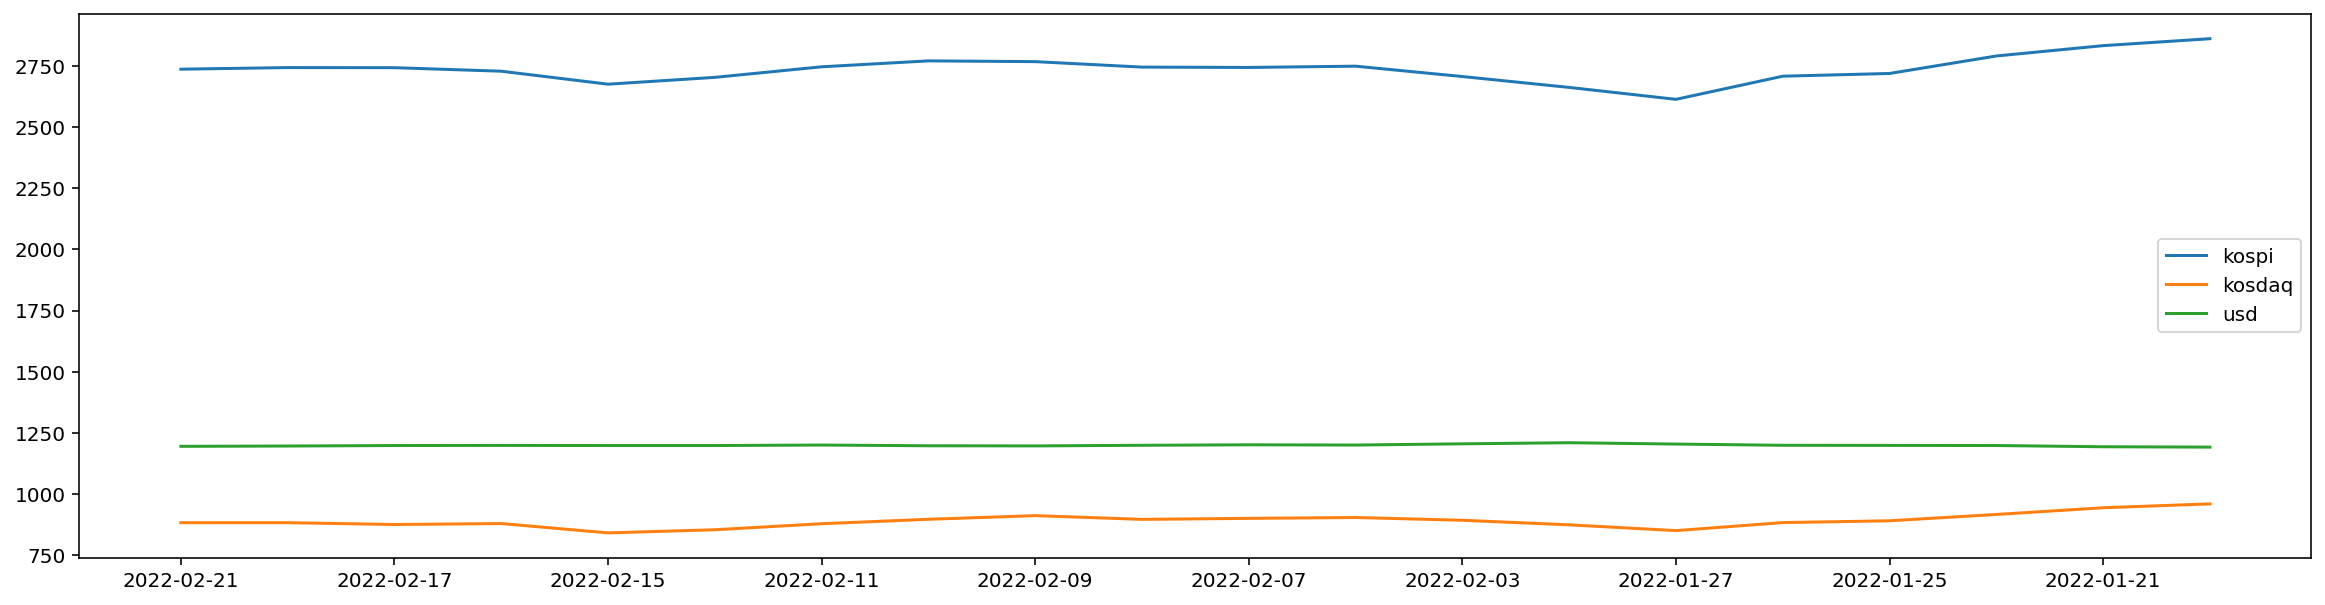

In [68]:
plt.figure(figsize=(20,5))
# plt.plot(df["date"], df["kospi"], label ="kospi")
# plt.plot(df["date"], df["kosdaq"], label = "kosdaq")
# plt.plot(df["date"], df["usd"] , label = "usd")

for column in df.columns[1:]:
    plt.plot(df["date"], df[column], label = column)
plt.xticks(df["date"][::2])
plt.legend()
plt.show()

In [45]:
# 데이터 스케일링 : min max scale
# z = (x - min(x)) / (max(x) - min(x)) : 0 <= z <= 1

In [69]:
from sklearn.preprocessing import minmax_scale

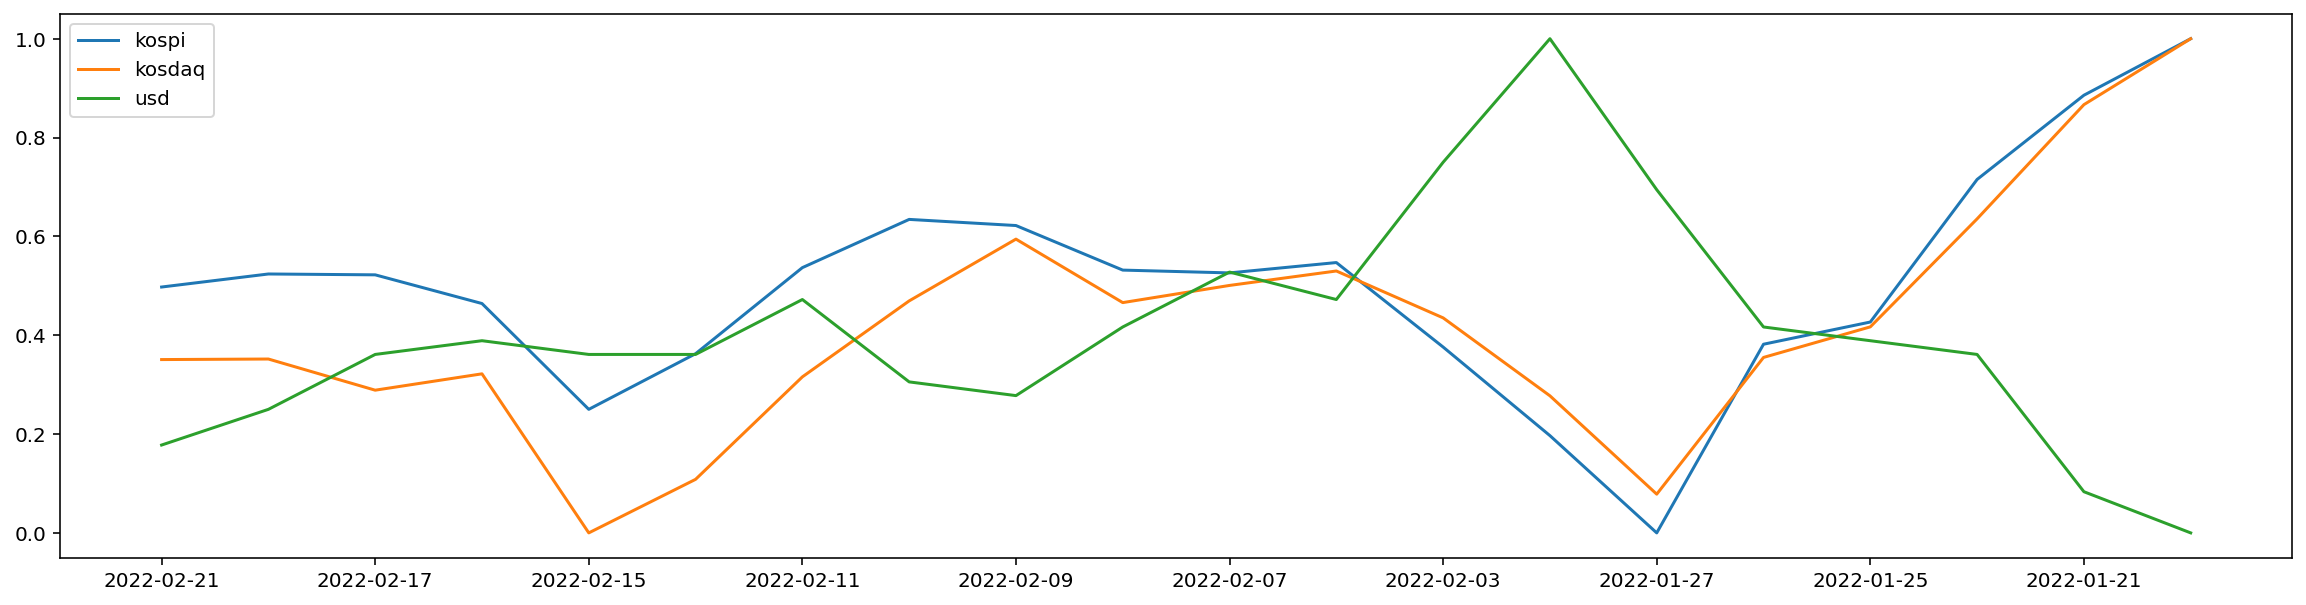

In [70]:
plt.figure(figsize=(20,5))
for column in df.columns[1:]:
    plt.plot(df["date"], minmax_scale(df[column]), label = column)
plt.xticks(df["date"][::2])
plt.legend()
plt.show()

In [ ]:
# 상관관계 분석
# 상관계수 : 0과 가까울수록 두 데이터는 관계 X
# 1과 가까울수록 두데이터는 강한 양의 상관관계
# -1과 가까울수록 두 데이터는 강한 음의 상관관계

In [ ]:
# kospi - kosdaq : 0.892 : 강한 양의 상관관계
# kospi - usd : -0.745 : 강한 음의 상관관계


In [72]:
df[df.columns[1:]].corr()

,kospi,kosdaq,usd
kospi,1.000000,0.892520,-0.746816
kosdaq,0.892520,1.000000,-0.504723
usd,-0.746816,-0.504723,1.000000
